<a href="https://www.kaggle.com/code/alnwsany/shakespeare-q?scriptVersionId=162641541" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Welocome - Shakespear quotes  
***this project it's was assignment for tensor-flow-s i hope you enjoy***

***it said thas if love lit you love shakespear...so let's go***

pic shakespear
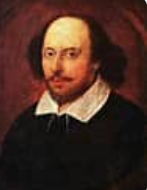

In [1]:
#import library 
import numpy as np
import matplotlib.pyplot as plt  #to show and present everthing on loss, accuracy
from tensorflow.keras.models import Sequential #our model it's sequnces
from tensorflow.keras.utils import to_categorical  #for one_hot_encode multi labels
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional  #this only layers i'm gonna use in this project


2024-02-12 17:03:10.096981: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-12 17:03:10.097080: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-12 17:03:10.223837: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
source_file = '/kaggle/input/shakespeare'   #shakespeare-text

In [3]:
#read text-file
with open('/kaggle/input/shakespeare/shakespeare.txt' , 'r') as f:
    data = f.read()
  
  #preprocessing (to lower case , split into corpus)  
corpus = data.lower().split("\n")

  #too big data so we just split 10000 lines 
corpus = corpus[:10000]

print(f"There are {len(corpus)} lines of shakespeare\n")
print(f"The first 5 lines look like this:\n")
for i in range(2):
  print(corpus[i])

There are 10000 lines of shakespeare

The first 5 lines look like this:

first citizen:
before we proceed any further, hear me speak.


In [4]:
#another example of the corpus[]
print(f"The 88th  line look like this:\n{corpus[88]}\n")

The 88th  line look like this:
with bats and clubs? the matter? speak, i pray you.



In [5]:
#built a tokenizer 
tokenizer = Tokenizer()

   #fit token on the corpus
tokenizer.fit_on_texts(corpus)

  #get the total_words in vocab
total_words = len(tokenizer.word_index) +1   #+1 for 'unknown' = 'OOV'
print(f"the total words in vocab  : {total_words}")

the total words in vocab  : 5725


***ok here we are let's create a sequence for token_lines*** 
for each line we'll make n-gram sequence for undersand what i mean:
ex = [1,2,3,4,5,6]

n_grams_ex =[
             [1,2]

             [1,2,3]
             
             [1,2,3,4]
             
             [1,2,3,4,5]
             
             [1,2,3,4,5,6] ]
             
this called n-gram              

In [6]:
#a list to save the sequences
input_sequences = []   

#forloop on all the lines in corpus 
for line in corpus :
     
    #for each line convert to sequence    
    token_list = tokenizer.texts_to_sequences([line])[0]
    
    #forloop on each line to creat n-gram (each line)..look above to understand
    for i in range(1,len(token_list)):
        
        n_gram_seqs = token_list[: i+1]
        #adding the sequence to the list
        input_sequences.append(n_gram_seqs)


In [7]:
#get the maxlen in the sequences..needed in the next steps
max_len_seq = max([len(x) for x in input_sequences])
print(f"the max_lenght in sequences : {max_len_seq}")

the max_lenght in sequences : 13


***next step padding the data for prepare for fit..using pad_sequnece***

In [8]:
padd_seq = pad_sequences(input_sequences , maxlen = max_len_seq, padding = 'pre')

In [9]:
print(f"an example after paddingd:\n{padd_seq[7777]}")

an example after paddingd:
[   0    0    0    0    0    0    0    0    2   10    1 3319    6]


***next step it's spliting the data for sentences and labels :***

  ***ex  = "when i heard about it i felt like i fly like a bird"***
 
  ***train = when i heard about it i felt like i fly like a  #as sequnce***
 
  ***label = bird                                            #as one_hot_encode***

In [10]:
features = padd_seq[: , :-1]  #the entire sequnce except the last elment 

labels  = to_categorical(padd_seq[: ,-1],num_classes = total_words) #the last elment and encoded using to_categorical()

***building a model ...***

In [11]:
model = Sequential()
    
model.add(Embedding(total_words, 100, input_length=max_len_seq-1)) #embedding as 1th layer 
model.add(Bidirectional(LSTM(120)))

#softmax as output layer with units = total words generate
model.add(Dense(total_words , activation = 'softmax'))


    # Compile the model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [12]:
history = model.fit(features, labels, epochs=50, verbose=1)

Epoch 1/50


I0000 00:00:1707757410.195205      71 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1264/1264 [==============================] - 24s 16ms/step - loss: 6.8009 - accuracy: 0.0405
Epoch 2/50
1264/1264 [==============================] - 10s 8ms/step - loss: 6.2486 - accuracy: 0.0597
Epoch 3/50
1264/1264 [==============================] - 10s 8ms/step - loss: 5.8603 - accuracy: 0.0854
Epoch 4/50
1264/1264 [==============================] - 11s 8ms/step - loss: 5.5375 - accuracy: 0.1005
Epoch 5/50
1264/1264 [==============================] - 10s 8ms/step - loss: 5.2327 - accuracy: 0.1127
Epoch 6/50
1264/1264 [==============================] - 9s 7ms/step - loss: 4.9159 - accuracy: 0.1269
Epoch 7/50
1264/1264 [==============================] - 9s 8ms/step - loss: 4.5902 - accuracy: 0.1466
Epoch 8/50
1264/1264 [==============================] - 10s 8ms/step - loss: 4.2602 - accuracy: 0.1762
Epoch 9/50
1264/1264 [==============================] - 10s 8ms/step - loss: 3.9371 - accuracy: 0.2194
Epoch 10/50
1264/1264 [==============================] - 9s 7ms/step - loss: 3.6271 -

***let's see how our model works :***

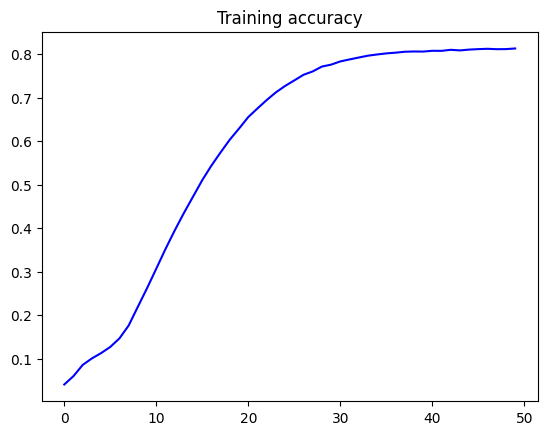

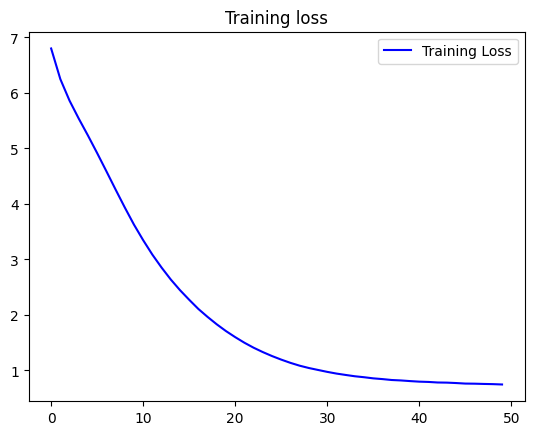

In [13]:
# Take a look at the training curves of the emodel

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

***finally let's quote (generate🦾) : ***

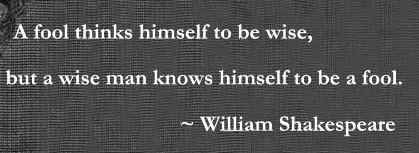

In [14]:
seed_text = "live with no one "
next_words = 10   # num of words to generate 

for _ in range(next_words):
    # Converting the text into sequences
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    # Pad the sequences
    token_list = pad_sequences([token_list], maxlen=max_len_seq -1, padding='pre')
    # Getting the probabilities of predicting a word
    predicted = model.predict(token_list, verbose=0)
    # Choosing the next word based on the maximum probability
    predicted = np.argmax(predicted, axis=-1).item()
    # Getting the actual word from the word index
    output_word = tokenizer.index_word[predicted]
    # Appending to the current text
    seed_text += " " + output_word

print(seed_text)

live with no one  no man i must wish the crown home were honour'd


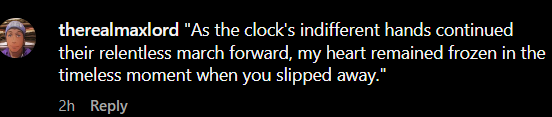